In [28]:
import os
import cv2
import time
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [29]:
path = os.getcwd() + '/train'

In [30]:
def image_loader(path):
    images = []
    labels = []
    for label in os.listdir(path):
        label_folder = os.path.join(path, label)
        for file in os.listdir(label_folder):
            image_path = os.path.join(label_folder, file)
            image = cv2.imread(image_path)
            image.resize(224,224,3)
            if image is not None:
                labels.append(label)
                images.append(image)
    return images, labels

In [31]:
X, y = image_loader(path)

print('X shape: ', np.array(X).shape)
print('y shape: ', np.array(y).shape)

X shape:  (118, 224, 224, 3)
y shape:  (118,)


In [32]:
X = np.array(X).reshape(-1, 224, 224, 3)
y = np.array(y).reshape(-1, 1)

In [33]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('X_train shape: ', np.array(X_train).shape)
print('X_val shape: ', np.array(X_val).shape)
print('y_train shape: ', np.array(y_train).shape)
print('y_val shape: ', np.array(y_val).shape)

X_train shape:  (94, 224, 224, 3)
X_val shape:  (24, 224, 224, 3)
y_train shape:  (94,)
y_val shape:  (24,)


In [35]:
label = pd.DataFrame(y, columns=['label'])
label['label'].value_counts()

0    60
1    58
Name: label, dtype: int64

In [36]:
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.

In [37]:
input_shape = X[0].shape
num_classes = len(label['label'].unique())

In [38]:
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation = "relu", input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation = "softmax")               
])

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [40]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [41]:
X_train.shape

(94, 224, 224, 3)

In [42]:
y_train[0]

1

In [43]:
epochs = 50
batch_size = 32
current_time = int(time.time())
stop_training_callback = earlystopper
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_val, y_val), 
                    callbacks=[stop_training_callback])
print("Training completed in {} seconds.".format(int(time.time()-current_time)))
print("Training Accuracy: {:.3f}".format(history.history['accuracy'][-1]))

Epoch 1/50
3/3 [==============================] - 1s 199ms/step - loss: 0.6102 - accuracy: 0.5532 - val_loss: 0.5291 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 78ms/step - loss: 0.4031 - accuracy: 0.8191 - val_loss: 0.5073 - val_accuracy: 0.7917
Epoch 3/50
3/3 [==============================] - 0s 64ms/step - loss: 0.3498 - accuracy: 0.8511 - val_loss: 0.4776 - val_accuracy: 0.7917
Epoch 4/50
3/3 [==============================] - 0s 63ms/step - loss: 0.3274 - accuracy: 0.8830 - val_loss: 0.4173 - val_accuracy: 0.7917
Epoch 5/50
3/3 [==============================] - 0s 66ms/step - loss: 0.2767 - accuracy: 0.8511 - val_loss: 0.4034 - val_accuracy: 0.7917
Epoch 6/50
3/3 [==============================] - 0s 64ms/step - loss: 0.2309 - accuracy: 0.9043 - val_loss: 0.4152 - val_accuracy: 0.7917
Epoch 7/50
3/3 [==============================] - 0s 68ms/step - loss: 0.2434 - accuracy: 0.8936 - val_loss: 0.3629 - val_accuracy: 0.7917
Epoch 8/50
3/3 [==========

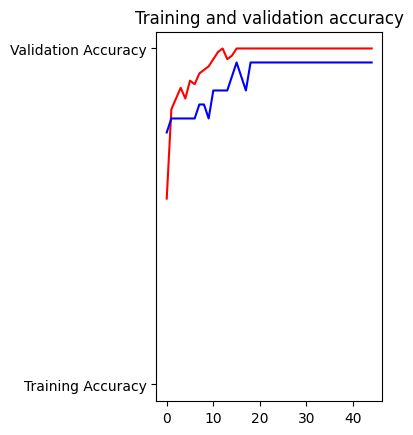

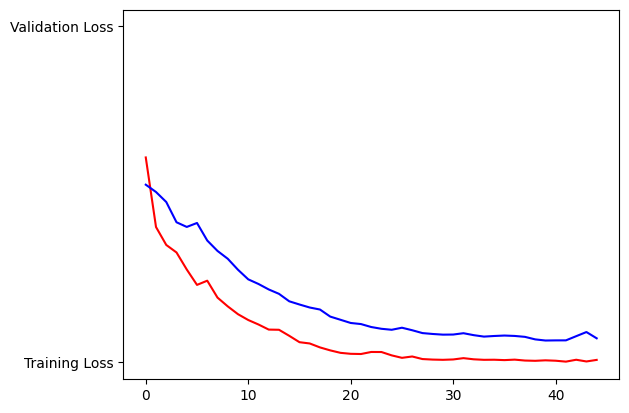

In [44]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [45]:
model.save('model.h5')

In [48]:
img_path = 'D:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\\train\Tienpm\Tienpm_75.jpg'
print(img_path)
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img / 255.0

img = np.array(img).reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model('model.h5')
prediction = model.predict(img)
print(prediction)

print(np.argmax(prediction))
print(encoder.inverse_transform([np.argmax(prediction)]) )

D:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Tienpm\Tienpm_75.jpg
1/1 [==============================] - 0s 65ms/step
[[0.566757 0.433243]]
0
['Duongtq']


In [49]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
y_true = y_val


1/1 [==============================] - 0s 322ms/step


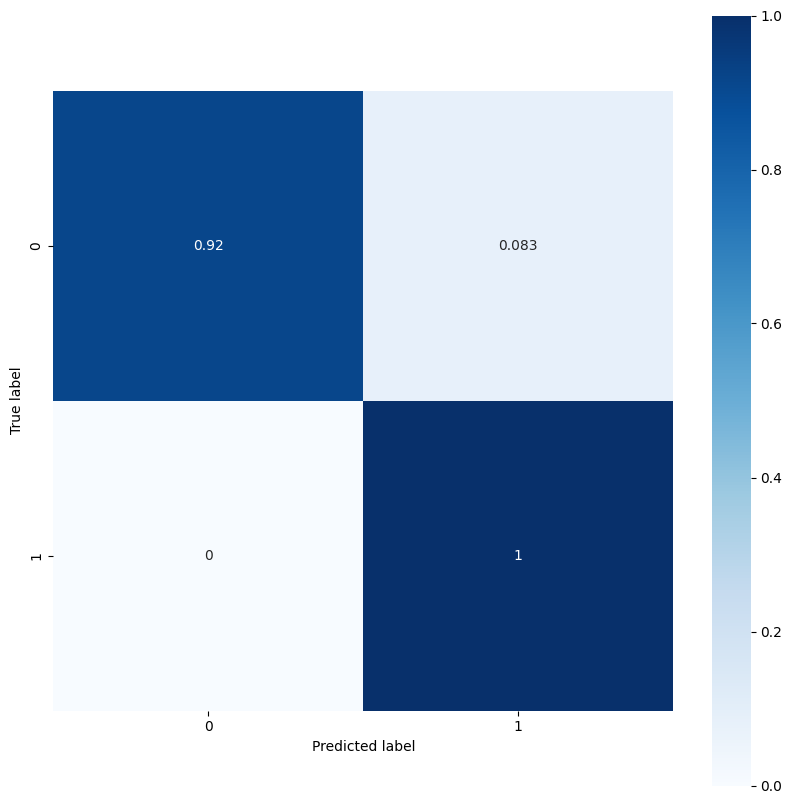

In [52]:
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [54]:
accuracy = np.sum(y_pred == y_true) / np.size(y_pred)
print("Accuracy: ", round(accuracy, 2))

Accuracy:  0.96
